In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from scipy.stats import norm
import math

In [2]:
! pwd

/Users/qiwi/Desktop/Project2/notebooks/exploratory/qsou


In [3]:
path = '../../../data/kc_house_data.csv'
df = pd.read_csv(path) #load the data
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
#df.drop_duplicates(['id'])

In [5]:
#df = df[np.abs(stats.zscore(df['price'])) < 3]

In [6]:
df.describe() #looked at the describe data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
df.info() #info of the df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [8]:
df.isna().sum() #look at null values

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [9]:
df.columns #columns in the df

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [10]:
df['year'] = pd.DatetimeIndex(df['date']).year #create new colums with only the year of year sold

In [11]:
df['house_age'] = df['year'] - df['yr_built']

In [12]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.395734
bedrooms         0.308787
lat              0.306692
waterfront       0.276295
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
year             0.003727
id              -0.016772
zipcode         -0.053402
house_age       -0.053890
Name: price, dtype: float64

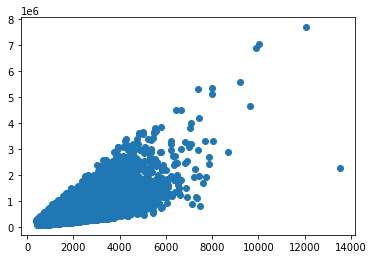

In [13]:
X = df['sqft_living']
Y = df['price']
plt.scatter(X,Y)

In [14]:
def calc_slope(xs,ys):
    
    # Use the slope formula above and calculate the slope
    m = (((np.mean(xs)*np.mean(ys)) - np.mean(xs*ys)) /
         ((np.mean(xs)**2) - np.mean(xs*xs)))
    
    return m

calc_slope(X,Y)

280.863014358875

In [15]:
def best_fit(xs,ys):
    
    # use the slope function with intercept formula to return calculate slope and intercept from data points
    m = calc_slope(xs,ys)
    c = np.mean(ys) - m*np.mean(xs)
    
    return m, c

m, c = best_fit(X,Y)
m, c

(280.863014358875, -43988.89219422813)

In [16]:
def reg_line (m, c, xs):
    
    return [(m*x)+c for x in xs]

regression_line = reg_line(m,c,X)

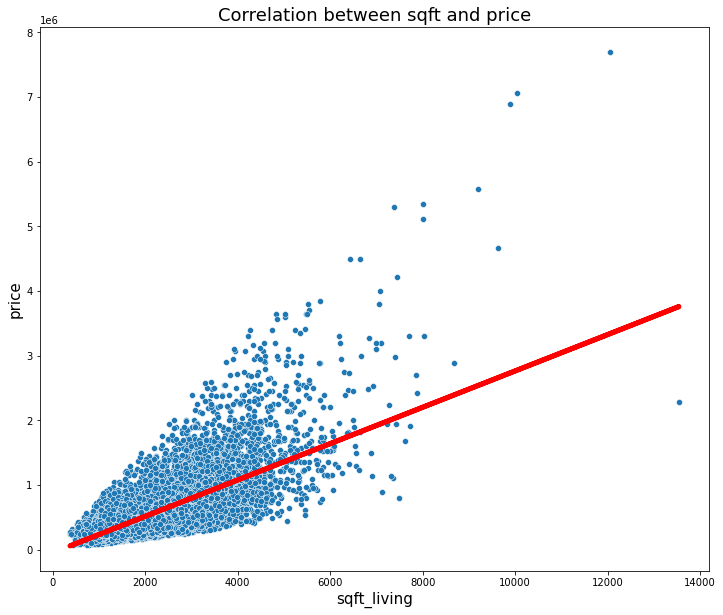

In [17]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x=df['sqft_living'], y=df['price'], ax=ax)
plt.plot(X, regression_line, lw=5, color='red')
ax.set_title('Correlation between sqft and price', fontsize=18)
ax.set_ylabel('price', fontsize=15)
ax.set_xlabel('sqft_living', fontsize=15);

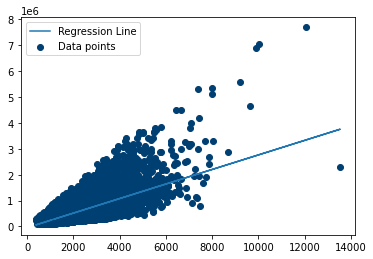

In [18]:
# Plot data and regression line
plt.scatter(X,Y,color='#003F72', label="Data points")
plt.plot(X, regression_line, label= "Regression Line")
plt.legend()

In [19]:
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

Skewness: 4.023365
Kurtosis: 34.541359


In [20]:
price_scaled = StandardScaler().fit_transform(df['price'][:,np.newaxis]);


<ipython-input-20-d39ece0c6b7a>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  price_scaled = StandardScaler().fit_transform(df['price'][:,np.newaxis]);


/Users/qiwi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


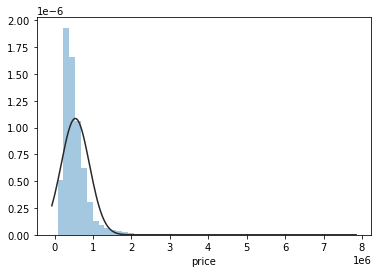

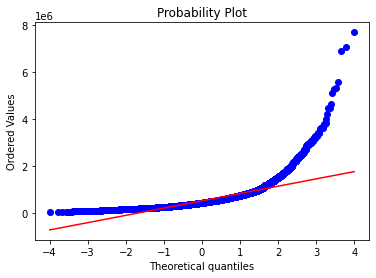

In [21]:
sns.distplot(df['price'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)

In [22]:
df['price'] = np.log(df['price'])

/Users/qiwi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


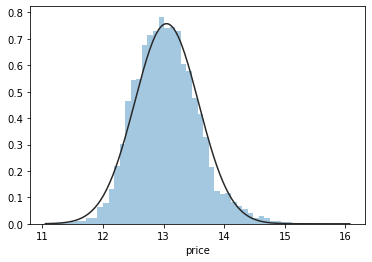

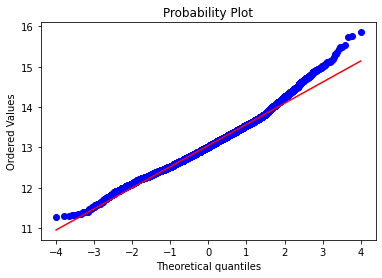

In [23]:
#transformed histogram and normal probability plot
sns.distplot(df['price'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)

In [24]:
df = df[np.abs(stats.zscore(df['price'])) < 3]

/Users/qiwi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


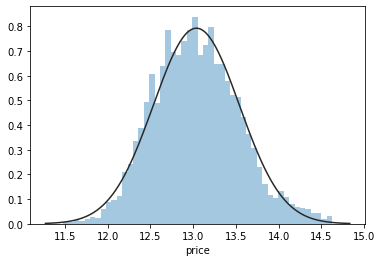

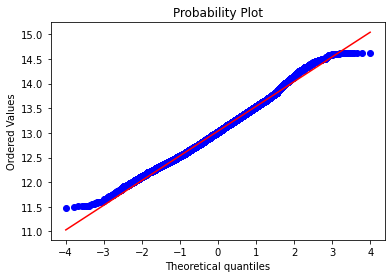

In [25]:
sns.distplot(df['price'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)

In [26]:
slimdf=df.drop(['sqft_lot','waterfront','condition','sqft_above','zipcode', 'long','sqft_lot15', 'date', 'sqft_basement', 'yr_renovated', 'view', 'id'], axis=1)

In [27]:
slimdf['price_log']=np.log(slimdf['price'])
slimdf

,price,bedrooms,bathrooms,sqft_living,floors,grade,yr_built,lat,sqft_living15,year,house_age,price_log
0,12.309982,3,1.00,1180,1.0,7,1955,47.5112,1340,2014,59,2.510410
1,13.195614,3,2.25,2570,2.0,7,1951,47.7210,1690,2014,63,2.579884
2,12.100712,2,1.00,770,1.0,6,1933,47.7379,2720,2015,82,2.493264
3,13.311329,4,3.00,1960,1.0,7,1965,47.5208,1360,2014,49,2.588616
4,13.142166,3,2.00,1680,1.0,8,1987,47.6168,1800,2015,28,2.575826
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,12.793859,3,2.50,1530,3.0,8,2009,47.6993,1530,2014,5,2.548965
21593,12.899220,4,2.50,2310,2.0,8,2014,47.5107,1830,2015,1,2.557167
21594,12.904459,2,0.75,1020,2.0,7,2009,47.5944,1020,2014,5,2.557573
21595,12.899220,3,2.50,1600,2.0,8,2004,47.5345,1410,2015,11,2.557167


In [28]:
X = slimdf['sqft_living']
Y = slimdf['price_log']
calc_slope(X,Y)
m, c = best_fit(X,Y)
regression_line = reg_line(m,c,X)

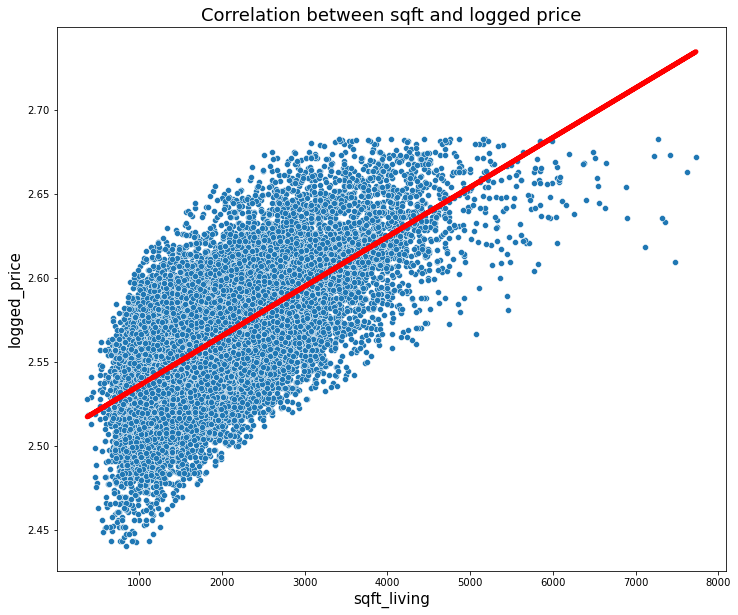

In [29]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x=df['sqft_living'], y=slimdf['price_log'], ax=ax)
plt.plot(X, regression_line, lw=5, color='red')
ax.set_title('Correlation between sqft and logged price', fontsize=18)
ax.set_ylabel('logged_price', fontsize=15)
ax.set_xlabel('sqft_living', fontsize=15);


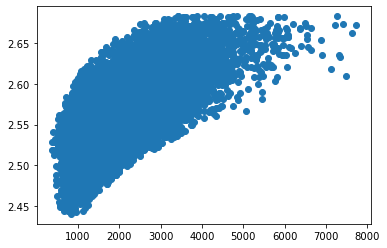

In [30]:
X = slimdf['sqft_living']
Y = slimdf['price_log']
plt.scatter(X,Y)

In [31]:
def calc_slope(xs,ys):
    
    # Use the slope formula above and calculate the slope
    m = (((np.mean(xs)*np.mean(ys)) - np.mean(xs*ys)) /
         ((np.mean(xs)**2) - np.mean(xs*xs)))
    
    return m

calc_slope(X,Y)

2.9526365835310533e-05

In [32]:
def best_fit(xs,ys):
    
    # use the slope function with intercept formula to return calculate slope and intercept from data points
    m = calc_slope(xs,ys)
    c = np.mean(ys) - m*np.mean(xs)
    
    return m, c

m, c = best_fit(X,Y)
m, c

(2.9526365835310533e-05, 2.506266973824281)

In [33]:
def reg_line (m, c, xs):
    
    return [(m*x)+c for x in xs]

regression_line = reg_line(m,c,X)

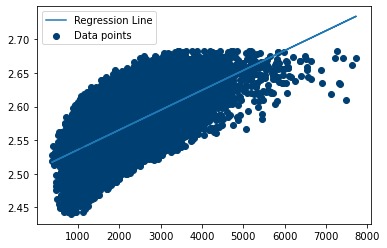

In [34]:
# Plot data and regression line
plt.scatter(X,Y,color='#003F72', label="Data points")
plt.plot(X, regression_line, label= "Regression Line")
plt.legend()

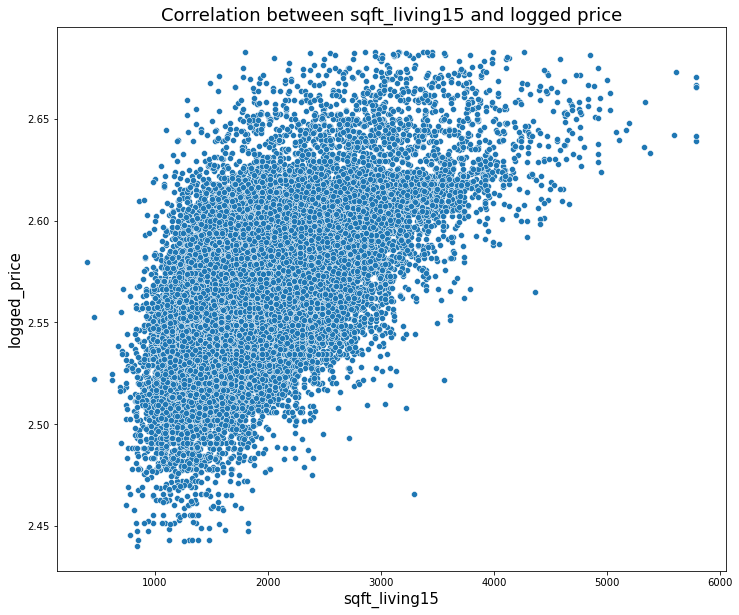

In [35]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x=df['sqft_living15'], y=slimdf['price_log'], ax=ax)
ax.set_title('Correlation between sqft_living15 and logged price', fontsize=18)
ax.set_ylabel('logged_price', fontsize=15)
ax.set_xlabel('sqft_living15' , fontsize=15);

In [36]:
X = df['sqft_living15']
calc_slope(X,Y)
m, c = best_fit(X,Y)
regression_line = reg_line(m,c,X)

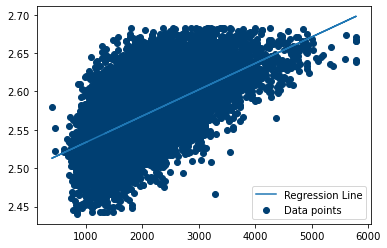

In [37]:
plt.scatter(X,Y,color='#003F72', label="Data points")
plt.plot(X, regression_line, label= "Regression Line")
plt.legend()

In [38]:
#stasmodels
f = 'price ~ sqft_living + house_age'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     9715.
Date:                Thu, 01 Jul 2021   Prob (F-statistic):               0.00
Time:                        10:28:15   Log-Likelihood:                -8768.9
No. Observations:               21428   AIC:                         1.754e+04
Df Residuals:                   21425   BIC:                         1.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.0503      0.009   1376.244      0.000      12.033      12.068
sqft_living     0.0004   3.03e-06    138.491      0.000       0.000       0.000
house_age       0.0028      9e-05     31.202      0.000       0.003       0.003
==============================================================================
Omnibus:                       41.159   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.319
Skew:                          -0.074   Prob(JB):                     4.78e-09
Kurtosis:                       2.855   Cond. No.                     7.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
f = 'price ~ sqft_living + bathrooms + sqft_living15 + house_age'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     5818.
Date:                Thu, 01 Jul 2021   Prob (F-statistic):               0.00
Time:                        10:28:15   Log-Likelihood:                -7805.8
No. Observations:               21428   AIC:                         1.562e+04
Df Residuals:                   21423   BIC:                         1.566e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.6731      0.012    960.677      0.000      11.649      11.697
sqft_living       0.0002   5.26e-06     42.814      0.000       0.000       0.000
bathrooms         0.1458      0.005     27.639      0.000       0.135       0.156
sqft_living15     0.0002   5.47e-06     37.372      0.000       0.000       0.000
house_age         0.0044   9.65e-05     45.398      0.000       0.004       0.005
==============================================================================
Omnibus:                       18.594   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.104
Skew:                          -0.035   Prob(JB):                     0.000193
Kurtosis:                       2.881   Cond. No.                     1.61e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
f = 'price ~ sqft_living + bedrooms + bathrooms + sqft_living15 + house_age'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     4809.
Date:                Thu, 01 Jul 2021   Prob (F-statistic):               0.00
Time:                        10:28:15   Log-Likelihood:                -7621.1
No. Observations:               21428   AIC:                         1.525e+04
Df Residuals:                   21422   BIC:                         1.530e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.7830      0.013    884.338      0.000      11.757      11.809
sqft_living       0.0003    5.5e-06     47.088      0.000       0.000       0.000
bedrooms         -0.0620      0.003    -19.302      0.000      -0.068      -0.056
bathrooms         0.1634      0.005     30.778      0.000       0.153       0.174
sqft_living15     0.0002   5.44e-06     36.006      0.000       0.000       0.000
house_age         0.0046   9.62e-05     47.596      0.000       0.004       0.005
==============================================================================
Omnibus:                        6.852   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.837
Skew:                          -0.043   Prob(JB):                       0.0328
Kurtosis:                       3.011   Cond. No.                     1.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
def linregtest(dataframe):
    X = dataframe.drop(['price','price_log'], axis=1)
    y = dataframe['price']
    X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    train_score = mean_squared_error(np.exp(y_train), np.exp(train_preds))
    test_score = mean_squared_error(np.exp(y_test), np.exp(test_preds))
    train_score_RSME = math.sqrt(train_score)
    test_score_RSME =math.sqrt(test_score)
    print('Train score:', train_score)
    print('Test score:', test_score)
    print('RSME train:', math.sqrt(train_score))
    print('RSME test:', math.sqrt(test_score))
    errors = pd.DataFrame()
    errors['bins'] = pd.qcut(y_train, 10)
    errors['error'] = train_preds - y_train
    errors.groupby('bins').mean().plot(kind='bar', figsize=(15,6))
    plt.xticks(rotation=40);
    return list(zip(X.columns, model.coef_))

Train score: 30196011615.814808
Test score: 29417368812.451546
RSME train: 173769.99630492833
RSME test: 171514.92300220276


[('bedrooms', -0.01816805656389122),
 ('bathrooms', 0.08444465288491372),
 ('sqft_living', 0.00015221942629307927),
 ('floors', 0.06069200338044238),
 ('grade', 0.1631311337939261),
 ('yr_built', 0.01253917686520123),
 ('lat', 1.300296985125425),
 ('sqft_living15', 0.00010530889452230185),
 ('year', 0.02968695173807225),
 ('house_age', 0.017147774872858183)]

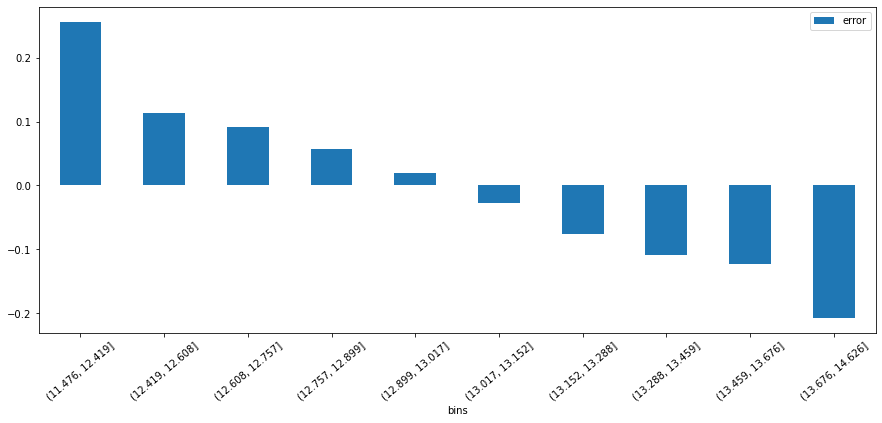

In [42]:
linregtest(slimdf) #when id duplicates dropped larger RSME, but is more accurate